C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_9948\4122123431.py:11: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_9948\4122123431.py:12: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



    Year  CPI (Index)  Inflation Rate (%)
30  2000       276.22                7.02
31  2001       302.28                9.44
32  2002       328.73                8.75
33  2003       348.85                6.12
34  2004       369.16                5.82


C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_9948\4122123431.py:66: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.

C:\Users\PRAKASH\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.



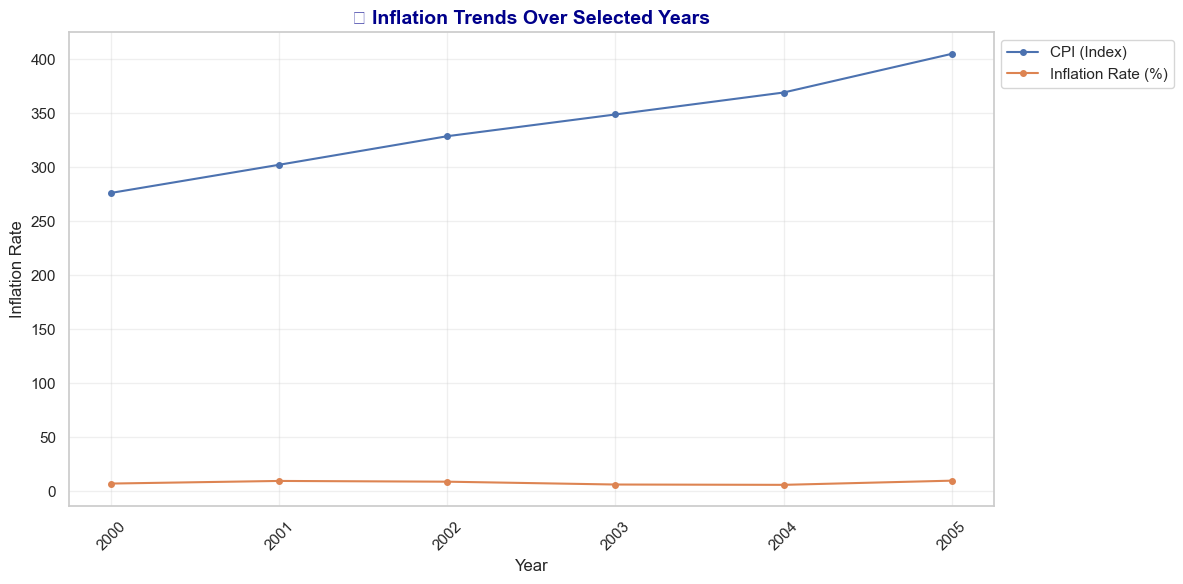

📥 Download your report: Inflation_Prediction_2000_to_2006.csv


C:\Users\PRAKASH\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

C:\Users\PRAKASH\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

#  Load and Preprocess Data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values
    df.fillna(method='bfill', inplace=True)  # Backward fill as extra safety
    df["Year"] = df["Year"].astype(int)
    return df

#  Get Inflation Data for Selected Years
def get_inflation_data(df, start_year=None, end_year=None):
    if start_year and end_year:
        return df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]
    return df

# Train Inflation Model (FIXED NaN Issue)
def train_inflation_model(df):
    X = df[["Year"]]
    y = df.drop(columns=["Year"])

    #  Fix: Fill NaN values to avoid model errors
    y.fillna(y.mean(), inplace=True)  

    models = {}
    for col in y.columns:
        model = LinearRegression()
        model.fit(X, y[col])  # No NaN issue now!
        models[col] = model
    return models

# Predict Future Inflation
def predict_inflation(models, start_year, end_year):
    future_years = np.array(range(start_year, end_year + 1)).reshape(-1, 1)
    predictions = {col: models[col].predict(future_years) for col in models.keys()}
    
    pred_df = pd.DataFrame(predictions)
    pred_df.insert(0, "Year", future_years.flatten())
    file_name = f"Inflation_Prediction_{start_year}_to_{end_year}.csv"
    pred_df.to_csv(file_name, index=False)

    return pred_df, file_name

#  Enhanced Visualization (Better Layout & Aesthetics)
def visualize_inflation(df, start_year, end_year):
    df_filtered = df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]

    #  Seaborn Styling for Clean Look
    plt.figure(figsize=(12, 6))
    sns.set_theme(style="whitegrid")
    
    for col in df_filtered.columns[1:]:
        plt.plot(df_filtered["Year"], df_filtered[col], label=col, marker='o', markersize=4)

    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Inflation Rate", fontsize=12)
    plt.title(" Inflation Trends Over Selected Years", fontsize=14, fontweight="bold", color="darkblue")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    #  Interactive Plot (for richer insights)
    fig = px.line(df_filtered, x="Year", y=df_filtered.columns[1:], title="Interactive Inflation Trends")
    fig.show()

# Load Dataset
file_path = r"D:\Finsight-Bharat\CPI_Inflation_India_1970_2024.csv"
df = load_and_preprocess_data(file_path)

# User Inputs
view_start = int(input(" \Enter start year to view inflation data: "))
view_end = int(input(" Enter end year to view inflation data: "))
print(get_inflation_data(df, view_start, view_end))

viz_start = int(input(" Enter start year for visualization: "))
viz_end = int(input(" Enter end year for visualization: "))
visualize_inflation(df, viz_start, viz_end)

pred_start = int(input("Enter start year for prediction: "))
pred_end = int(input("Enter end year for prediction: "))
models = train_inflation_model(df)
pred_df, report_file = predict_inflation(models, pred_start, pred_end)
print(f"Download your report: {report_file}")


not found
